In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import keras
from keras.models import Sequential, InputLayer
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras import backend as K
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split  
from keras.models import load_model
from keras.callbacks import History 

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def load_data(path):
    df_train = pd.read_csv(path + 'fashion-mnist_train.csv')
    df_test = pd.read_csv(path + 'fashion-mnist_test.csv')

    df_features = df_train.iloc[:, 1:785]
    df_label = df_train.iloc[:, 0]

    x_test = df_test.iloc[:, 1:785]
    y_test = df_test.iloc[:, 0]

    return df_features, df_label, x_test, y_test

In [0]:
def preprocess_data(x_train, y_train, x_test, y_test, num_classes, input_shape):

    img_rows, img_cols = input_shape

    x_train = np.array(x_train)
    x_test = np.array(x_test)

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows* img_cols)
        input_shape = (img_rows* img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows* img_cols)


    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                test_size = 0.2,
                                                random_state = 1212)
    
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    y_val = keras.utils.to_categorical(y_val, num_classes)

    return x_train, y_train, x_val, y_val, x_test, y_test

In [5]:
# Load fasion-mnist data
x_train, y_train, x_test, y_test = load_data('/content/drive/My Drive/fashionmnist/')
x_train, y_train, x_val, y_val, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test, 
                                                                 num_classes=10, input_shape=(28,28))
print("X_train's shape: " + str(x_train.shape))
print("X_val's shape: " + str(x_val.shape))

X_train's shape: (48000, 28, 28, 1)
X_val's shape: (12000, 28, 28, 1)


In [31]:
# Create model

model = Sequential()

# input: 28x28 images with 1 channels -> (28, 28, 1) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(InputLayer(input_shape = (28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)       

In [32]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=60)
model.save_weights("./model.h5")

Epoch 1/60
48000/48000 [==============================] - 23s 483us/step - loss: 0.5929 - acc: 0.7896
Epoch 2/60
48000/48000 [==============================] - 21s 435us/step - loss: 0.3532 - acc: 0.8728
Epoch 3/60
48000/48000 [==============================] - 20s 427us/step - loss: 0.3025 - acc: 0.8911
Epoch 4/60
48000/48000 [==============================] - 21s 432us/step - loss: 0.2769 - acc: 0.8998
Epoch 5/60
48000/48000 [==============================] - 20s 421us/step - loss: 0.2541 - acc: 0.9090
Epoch 6/60
48000/48000 [==============================] - 20s 412us/step - loss: 0.2406 - acc: 0.9122
Epoch 7/60
48000/48000 [==============================] - 20s 412us/step - loss: 0.2279 - acc: 0.9173
Epoch 8/60
48000/48000 [==============================] - 20s 410us/step - loss: 0.2168 - acc: 0.9204
Epoch 9/60
48000/48000 [==============================] - 20s 413us/step - loss: 0.2092 - acc: 0.9231
Epoch 10/60
48000/48000 [==============================] - 20s 407us/step - loss: 

In [33]:
# Evaluate model on training set
score_train = model.evaluate(x_train, y_train, batch_size=64)
print('train_loss: %.5f - train_acc: %.2f%%' % (score_train[0], score_train[1]*100))

48000/48000 [==============================] - 5s 111us/step
train_loss: 0.02589 - train_acc: 99.27%


In [34]:
# Evaluate model on valid set
score_val = model.evaluate(x_val, y_val, batch_size=64)
print('val_loss: %.5f - val_acc: %.2f%%' % (score_val[0], score_val[1]*100))

12000/12000 [==============================] - 1s 97us/step
val_loss: 0.20546 - val_acc: 93.51%


In [35]:
# Evaluate model on test set
score_test = model.evaluate(x_test, y_test, batch_size=64)
print('test_loss: %.5f - test_acc: %.2f%%' % (score_test[0], score_test[1]*100))

10000/10000 [==============================] - 1s 97us/step
test_loss: 0.18010 - test_acc: 94.25%


['Bag', 'Shirt', 'Bag', 'Dress', 'Bag']


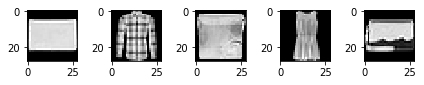

In [36]:
# Predict for test dataset
y_pred = model.predict(x_test)

# Convert test to labels 
y_hat = np.argmax(y_pred, axis=1)
labels_text = ['T-shirt/top',
'Trouser/pants',
'Pullover shirt',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

# Show ramdom 5 text image and labels predict
random_indexes = random.sample(range(x_test.shape[0]),5)
#Visualizing the orginal images
fig, axes = plt.subplots(nrows=1, ncols=5)
original_images = [x_test[i].reshape((28, 28)) for i in random_indexes]
i = 0
for ax in axes:
    ax.imshow(original_images[i], cmap ='gist_gray')
    i += 1
fig.tight_layout()

print([labels_text[i] for i in y_hat[random_indexes]])

dict_keys(['loss', 'acc'])


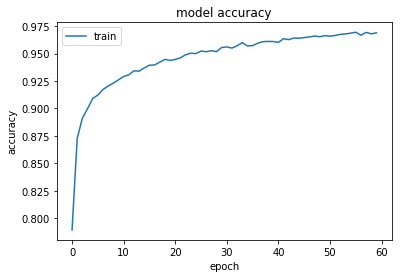

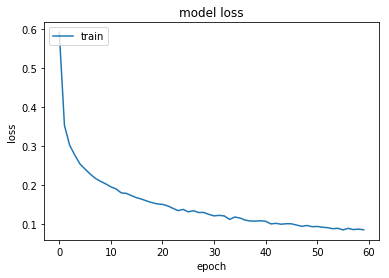

In [37]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()